# JupyterLite `xeus-sqlite` Kernel Demo

The [`jupyterlite/xeus-sqlite-kernel`](https://github.com/jupyterlite/xeus-sqlite-kernel) wraps the original [`jupyter-xeus/xeus-sqlite`](https://github.com/jupyter-xeus/xeus-sqlite/) kernel for use in JupyterLite.

Original kernel docs can be found [here](https://xeus-sqlite.readthedocs.io/en/latest/).

The kernel provides cell magic for command line database operations, and native execution of SQL code against a connected database.

## Creating a Database

Line magic is used to create an in-memory database:

In [1]:
%CREATE example_db.db

Currently, there is no ability to:

- save the database to browser storage;
- export the database;
- load a database from browser storage;
- load a database from a URL;
- load a database from the desktop;
- connect to a remote sqlite database file.

## Create and Populate Tables

Tables are created and populated using SQL:

In [2]:
CREATE TABLE players (Name STRING, Class STRING, Level INTEGER, Hitpoints INTEGER)

In [3]:
INSERT INTO players (Name, Class, Level, Hitpoints) VALUES ("Martin Splitskull", "Warrior", 3, 40)

In [4]:
SELECT COUNT(*) as rowcount FROM players

rowcount
1


Only one command can be executed from within a single code cell:

In [5]:
INSERT INTO players (Name, Class, Level, Hitpoints) VALUES ("Sir Wolf", "Cleric", 2, 20);

-- The following will not be inserted
INSERT INTO players (Name, Class, Level, Hitpoints) VALUES ("Sylvain, The Grey", "Wizard", 1, 10);

In [6]:
SELECT Name, Level, Hitpoints FROM players;

Name,Level,Hitpoints
Martin Splitskull,3,40
Sir Wolf,2,20


In [7]:
INSERT INTO players (Name, Class, Level, Hitpoints) VALUES ("Sylvain, The Grey", "Wizard", 1, 10);

In [8]:
SELECT Name, Level, Hitpoints FROM players;

Name,Level,Hitpoints
Martin Splitskull,3,40
Sir Wolf,2,20
"Sylvain, The Grey",1,10


## Quuerying Tables

A full range of SQL query commands are supported, including aggregation operations:

In [ ]:
SELECT SUM (Level) FROM players

Grouping also works:

In [11]:
SELECT Level, SUM(Hitpoints) AS `Total Hitpoints`
FROM players
GROUP BY Level
ORDER BY `Total Hitpoints` DESC;

Level,Total Hitpoints
3,40
2,20
1,10


## Charting Using Vega

The `jupyter-xeus/xeus-sqlite` kernel also bundles Vega charting components.

Vega charts can be generated by piping the result of a SQL query into a Vega line magic command.

Level,Hitpoints
3,40
2,20
1,10


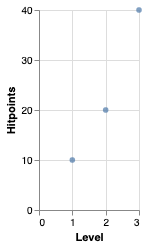

In [12]:
%XVEGA_PLOT
    X_FIELD Level
    Y_FIELD Hitpoints
    MARK circle
    WIDTH 100
    HEIGHT 200
    <>
    SELECT Level, Hitpoints FROM players

## Database Admininstration

Several line magics are defined to support database administration

In [15]:
%TABLE_EXISTS players

The table players exists.

In [16]:
%TABLE_EXISTS npcs

The table npcs doesn't exist.

In [17]:
%GET_INFO

Magic header string: SQLite format 3
Page size bytes: 4096
File format write version: 1
File format read version: 1
Reserved space bytes: 0
Max embedded payload fraction 64
Min embedded payload fraction: 32
Leaf payload fraction: 32
File change counter: 4
Database size pages: 2
First freelist trunk page: 0
Total freelist trunk pages: 0
Schema cookie: 1
Schema format number: 4
Default page cache size bytes: 0
Largest B tree page number: 0
Database text encoding: 1
User version: 0
Incremental vaccum mode: 0
Application ID: 0
Version valid for: 4
SQLite version: 3032003


## Connecting to a Different Databases

Creating a new database will connect the kernel to the new database instance.

In [18]:
%CREATE potato.db 

In [19]:
CREATE TABLE potaters(production INTEGER)

In [20]:
INSERT INTO potaters (production) VALUES (7)

In [21]:
SELECT * FROM potaters

production
7


The original database is lost:

In [23]:
SELECT Name, Level, Hitpoints FROM players;

Error: no such table: players